# 第一次讀書會報告

組別:第9組

Date:2024/03/26

# 1.載入環境及安裝套件

In [ ]:
# 載入套件
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from datetime import datetime
from collections import Counter
from tqdm import tqdm

from wordcloud import WordCloud # pip install wordcloud
import matplotlib.pyplot as plt

# 下載斷句需要的資源
nltk.download('punkt')
# 下載POS tagger需要的資源
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
#下載停用詞
nltk.download('stopwords')

%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 150

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# 設定圖的字體大小
plt.rcParams['font.size'] = 14

# 設定中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
# 也可參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']

# 2.資料前處理

## 2.1資料蒐集
本組自Kaggle下載Amazon上有關Finee Food類的評論資料集。
本組自Kaggle下載Amazon上有關Finee Food類的評論資料集。
該資料集包括對來自亞馬遜的精美食品的評論。
這些資料的使用期限超過10年，包括1999年10月至2012年10月
約500,000條評論。評論包括產品和使用者資訊，評級以及純文字評論。
它還包括來自所有其他亞馬遜類別的評論。

Data includes:
*   Reviews from Oct 1999 - Oct 2012
*   568,454 reviews
*   256,059 users
*   74,258 products

資料來源:https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [ ]:
##讀取資料集
Amazon_df = pd.read_csv('./2024_study_group9_1/raw_data/Amazon_Fine_Food_Reviews.csv')
Amazon_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
#資料集資訊
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


查看每一列資料的資料類型和資料總數
> 發現：
> 1. ProfileName有缺失值=568454-568438=16，缺失率=16/568454=0.002%
> 2. Summary有缺失值=568454-568427=27，缺失率=27/568454=0.005%

In [ ]:
#缺失值處理,由於樣本數較大，缺失值量較少，直接删除缺失值
Amazon_df = Amazon_df.dropna(subset = ['ProfileName','Summary'],how = 'any')
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [ ]:
#重覆值處理
Amazon_df = Amazon_df.drop_duplicates(subset= ['ProductId','UserId','Score', 'Text'] ,keep = 'first')
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567122 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      567122 non-null  int64 
 1   ProductId               567122 non-null  object
 2   UserId                  567122 non-null  object
 3   ProfileName             567122 non-null  object
 4   HelpfulnessNumerator    567122 non-null  int64 
 5   HelpfulnessDenominator  567122 non-null  int64 
 6   Score                   567122 non-null  int64 
 7   Time                    567122 non-null  int64 
 8   Summary                 567122 non-null  object
 9   Text                    567122 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.6+ MB


In [ ]:
#異常值處理
Amazon_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,567122.000000,567122.000000,567122.000000,567122.000000,5.671220e+05
mean,284250.709428,1.741373,2.223440,4.184149,1.296295e+09
std,164113.047369,7.639971,8.288286,1.309309,4.803956e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142117.250000,0.000000,0.000000,4.000000,1.271290e+09
50%,284268.500000,0.000000,1.000000,5.000000,1.311206e+09
75%,426374.750000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


此部分為將時間轉換成datetime格式

In [ ]:
'''
定義時間戳記轉換函數：
先使用datetime轉換時間戳記為datetime形式 例如”2016-11-30 06:12:49.750000“
再使用strftime函數分離出date
最後轉換為Series類型
'''
def changeTimstamp(timeCol):
    dateList = []
    for time in timeCol:
        #例如：datetime.fromtimestamp(1480486369.75) 轉換後為2016-11-30 06:12:49.750000格式
        dt = datetime.fromtimestamp(time)
        #分隔後僅剩2016-11-30
        date = dt.strftime("%Y-%m-%d")
        dateList.append(date)

    #將一維資料再轉換回Series類型
    dateSer = pd.Series(dateList)
    return dateSer
#獲取時間戳記一列
time = Amazon_df.loc[:, 'Time']
#使用轉換函數隔離出date
dateSer = changeTimstamp(time)

#修改這一列值
Amazon_df.loc[:, 'Time'] = dateSer

In [ ]:
#字串轉換為日期類型
Amazon_df.loc[:, 'Time'] = pd.to_datetime(Amazon_df.loc[:, 'Time'],
                                         format = '%Y-%m-%d',
                                         errors= 'coerce')
'''
轉換日期過程中可能會發生不符合日期格式的數值轉換為空值
還需刪除空值
'''
Amazon_df = Amazon_df.dropna(subset = ['Time'])

In [ ]:
#按日期升冪排序
Amazon_df = Amazon_df.sort_values(by = 'Time',
                                 ascending = True,
                                 na_position = 'first')
#排序後重命名行號（index）：排序後的列索引值是之前的行號，需要修改成從0到N的升冪索引值
Amazon_df = Amazon_df.reset_index(drop = True)

In [ ]:
Amazon_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150141,B003WP7ONG,A1QS9CHFCEB3WJ,"Daniel Murphy ""Dan Murphy""",6,8,1,1999-10-08,An Insult to The Consumer,"For starters, I'm not an anti-Splenda fanatic...."
1,150118,B003YBP6Q0,AWXG1VBHSB6CB,R. Dunne,1,5,1,1999-10-25,Awful!,I ended up throwing away most of this. The hum...
2,450728,B001EO6CMQ,A2EXCHMH5MI3CM,Hilda S. Najjar,0,0,5,1999-12-02,Great product,I'm not sure why someone gave this a 2 star re...
3,450750,B0000V8IOE,A1QRJBMOKKNHBV,Galland1928,1,2,3,1999-12-06,Not what I was expecting,"Like many product review readers, I take all n..."
4,373457,B001BM62T4,A34W7QA4J5UTOR,K. Hill,0,1,3,1999-12-06,Red Espresso Rooibos Tea Expresso,I prepared the Red Espresso Rooibos Tea Espres...
...,...,...,...,...,...,...,...,...,...,...
565790,317175,B0002DK60E,A24T532TFWAGYG,Nicole,0,0,5,2012-10-26,Love this litter box!!,My family recently adopted a 2 month old kitte...
565791,169066,B000FBOA5A,A1RC13UJK5F8G2,Arlene D. Odom,0,0,5,2012-10-26,Excellent,I love these crackers. I watch my weight very ...
565792,312403,B001E5E2QI,A26NTJEZUNLXDT,M. Chase,5,5,5,2012-10-26,Great for more than coffee,Great in coffee and so much more. Can use to m...
565793,541196,B004OW0W9E,AY3RXGEFQVWS1,DianeS,3,4,5,2012-10-26,Best Canned Tuna I've Had,This is an amazing canned tuna. The tuna is li...


In [ ]:
#將年份取出並增加一個columns
Amazon_df['Year'] = Amazon_df['Time'].dt.strftime("%Y")
Amazon_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year
0,150141,B003WP7ONG,A1QS9CHFCEB3WJ,"Daniel Murphy ""Dan Murphy""",6,8,1,1999-10-08,An Insult to The Consumer,"For starters, I'm not an anti-Splenda fanatic....",1999
1,150118,B003YBP6Q0,AWXG1VBHSB6CB,R. Dunne,1,5,1,1999-10-25,Awful!,I ended up throwing away most of this. The hum...,1999
2,450728,B001EO6CMQ,A2EXCHMH5MI3CM,Hilda S. Najjar,0,0,5,1999-12-02,Great product,I'm not sure why someone gave this a 2 star re...,1999
3,450750,B0000V8IOE,A1QRJBMOKKNHBV,Galland1928,1,2,3,1999-12-06,Not what I was expecting,"Like many product review readers, I take all n...",1999
4,373457,B001BM62T4,A34W7QA4J5UTOR,K. Hill,0,1,3,1999-12-06,Red Espresso Rooibos Tea Expresso,I prepared the Red Espresso Rooibos Tea Espres...,1999
...,...,...,...,...,...,...,...,...,...,...,...
565790,317175,B0002DK60E,A24T532TFWAGYG,Nicole,0,0,5,2012-10-26,Love this litter box!!,My family recently adopted a 2 month old kitte...,2012
565791,169066,B000FBOA5A,A1RC13UJK5F8G2,Arlene D. Odom,0,0,5,2012-10-26,Excellent,I love these crackers. I watch my weight very ...,2012
565792,312403,B001E5E2QI,A26NTJEZUNLXDT,M. Chase,5,5,5,2012-10-26,Great for more than coffee,Great in coffee and so much more. Can use to m...,2012
565793,541196,B004OW0W9E,AY3RXGEFQVWS1,DianeS,3,4,5,2012-10-26,Best Canned Tuna I've Had,This is an amazing canned tuna. The tuna is li...,2012


因本資料集資料量 `較大`，執行過程效能較為不佳，故改為選取: `1999年`到`2007年` 共 `30911` 筆資料來進行以下研究

In [ ]:
#資料選取
filt = (Amazon_df['Year'] < "2008")
Amazon_df_filt=Amazon_df[filt]
Amazon_df_filt

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year
0,150141,B003WP7ONG,A1QS9CHFCEB3WJ,"Daniel Murphy ""Dan Murphy""",6,8,1,1999-10-08,An Insult to The Consumer,"For starters, I'm not an anti-Splenda fanatic....",1999
1,150118,B003YBP6Q0,AWXG1VBHSB6CB,R. Dunne,1,5,1,1999-10-25,Awful!,I ended up throwing away most of this. The hum...,1999
2,450728,B001EO6CMQ,A2EXCHMH5MI3CM,Hilda S. Najjar,0,0,5,1999-12-02,Great product,I'm not sure why someone gave this a 2 star re...,1999
3,450750,B0000V8IOE,A1QRJBMOKKNHBV,Galland1928,1,2,3,1999-12-06,Not what I was expecting,"Like many product review readers, I take all n...",1999
4,373457,B001BM62T4,A34W7QA4J5UTOR,K. Hill,0,1,3,1999-12-06,Red Espresso Rooibos Tea Expresso,I prepared the Red Espresso Rooibos Tea Espres...,1999
...,...,...,...,...,...,...,...,...,...,...,...
30906,171984,B00141QX32,A26M0PF4A0DT3K,D. Carroll,1,2,2,2007-12-31,Inconsistent moisture content,We've been giving this treat to our little Yor...,2007
30907,6457,B000FNEX50,A2KEBMHZJU24EL,Amy B. Zaslavsky,2,2,5,2007-12-31,I love these!,I have to disagree with the other review here!...,2007
30908,553757,B001T7I8T8,A3V54VTCAT3SCS,Elizabeth Howard,0,0,5,2007-12-31,GOING ORGANIC AND SWEET!!,I bought these cookies as Easter gifts for two...,2007
30909,869,B000VKYKTG,A35MKC4WRQ8M8F,Grael,0,0,5,2007-12-31,Pocky!!,Everyone loves Pocky and if they say they don'...,2007


In [ ]:
reviews_year  = Amazon_df_filt["Year"]

In [ ]:
#計算出不同年份的評論筆數，並轉成dataframe
Amazon_df_count = pd.DataFrame({
    'year': Amazon_df_filt.groupby(reviews_year).size().index,
    'content': Amazon_df_filt.groupby(reviews_year).size().values
#     'word': token_df.groupby(reviews_year).size().values,
})
Amazon_df_count[:10]

,year,content
0,1999,6
1,2000,32
2,2001,13
3,2002,72
4,2003,131
5,2004,558
6,2005,1329
7,2006,6628
8,2007,22180


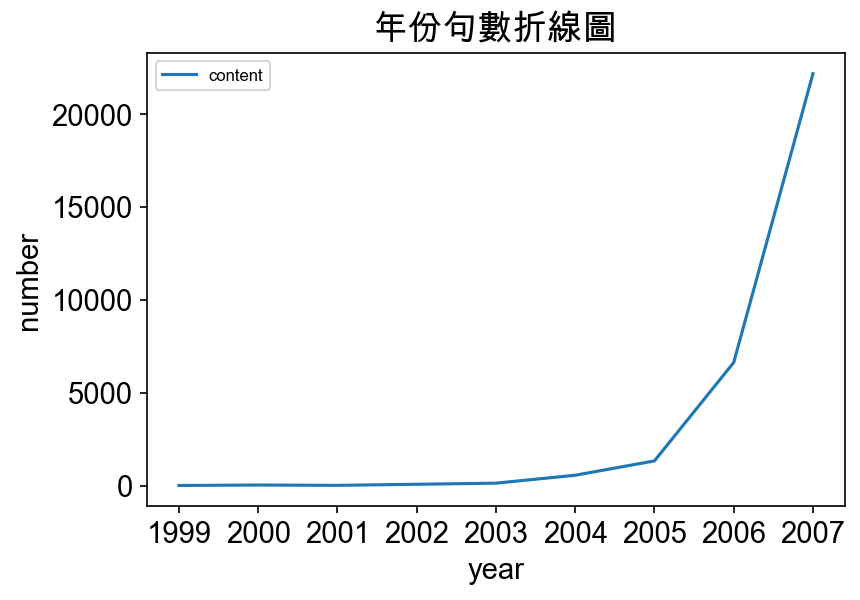

In [ ]:
#畫出年份句數折線圖
plt.plot(Amazon_df_count['year'].values, Amazon_df_count['content'].values ,label = 'content')
#plt.plot(Amazon_df_count['year'].values, reviews_count['word'].values, label = 'words')

plt.title('年份句數折線圖') # 標題
plt.xlabel('year') # x軸標題
plt.ylabel('number') # y軸標題
plt.legend(fontsize=8) # 顯示label
plt.show()

In [ ]:
#選擇前1999年到2007年的30911則評論
content_df= pd.DataFrame(Amazon_df['Text'].iloc[:30911].values, columns=['sentence'])
#content_df = Amazon_df['Text'].iloc[:30912].values
year_df = pd.DataFrame(Amazon_df['Year'].iloc[:30911].values, columns=['year'])

new_content_df = {
     "year" :year_df["year"],
     "sentence" :content_df["sentence"]
 }
content_df = pd.DataFrame(new_content_df)
content_df

,year,sentence
0,1999,"For starters, I'm not an anti-Splenda fanatic...."
1,1999,I ended up throwing away most of this. The hum...
2,1999,I'm not sure why someone gave this a 2 star re...
3,1999,"Like many product review readers, I take all n..."
4,1999,I prepared the Red Espresso Rooibos Tea Espres...
...,...,...
30906,2007,We've been giving this treat to our little Yor...
30907,2007,I have to disagree with the other review here!...
30908,2007,I bought these cookies as Easter gifts for two...
30909,2007,Everyone loves Pocky and if they say they don'...


## 2.2資料清洗



移除無意義字、標點符號


清除文本中的標點符號、數字以及換行符號，並將長度小於1的句子刪除

In [ ]:
# 刪除標點符號/數字/換行符號
content_df["sentence"] = content_df["sentence"].apply(lambda x: re.sub(r'[^\w\s]','', x))  #只留下英文字母和空格(包含換行符號)
content_df["sentence"] = content_df["sentence"].apply(lambda x: re.sub(r'[\n_-]+',' ', x)) #將換行符號替換成空格
content_df["sentence"] = content_df["sentence"].apply(lambda x: re.sub(r"http\S+",' ', x))#移除有http的網址
content_df["sentence"] = content_df["sentence"].apply(lambda x: re.sub(r'[?|!|\'|"|#]',' ', x))#去除評論中的各種符號
content_df["sentence"] = content_df["sentence"].apply(lambda x: re.sub(r'[.|,|)|(|\|/]',' ', x))#去除評論中的各種符號
content_df["sentence"] = content_df["sentence"].apply(lambda x: re.sub(r"\S*\d\S*",' ', x))#去除單字中的數字
content_df["sentence"] = content_df["sentence"].apply(lambda x: re.sub(r'[^A-Za-z0-9]+',' ', x))#去除評論中的特殊字符

# 刪除長度小於1的句子
content_df = content_df[~content_df["sentence"].str.len() < 1]

content_df

,year,sentence
0,1999,For starters Im not an antiSplenda fanatic Ive...
1,1999,I ended up throwing away most of this The humm...
2,1999,Im not sure why someone gave this a star revie...
3,1999,Like many product review readers I take all ne...
4,1999,I prepared the Red Espresso Rooibos Tea Espres...
...,...,...
30906,2007,Weve been giving this treat to our little York...
30907,2007,I have to disagree with the other review here ...
30908,2007,I bought these cookies as Easter gifts for two...
30909,2007,Everyone loves Pocky and if they say they dont...


In [ ]:
#此處為將清洗好的資料存成csv檔匯出
content_df.to_csv("./2024_study_group7_1/raw_data/test_content_df.csv", encoding = 'utf-8',index = False)

## 2.3斷句及字詞正規化

本小組在此研究選擇使用`spacy`的英文`en_core_web_sm`模型將評論同時進行token及字型還原


In [ ]:
# pip install spacy
# 下載網址：https://github.com/explosion/spacy-models/releases?q=en_core_web_sm&expanded=true
# pip install "/Users/billyke/en_core_web_sm-3.7.1-py3-none-any.whl"
# !python3 -m spacy download en_core_web_sm
#使用spacy將評論同時進行token及字型還原

import spacy
nlp = spacy.load('en_core_web_sm')
def tokenize_and_lemmatize(sentence):
    doc = nlp(sentence)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens


In [ ]:
#生成出token
token_df = content_df.assign(token = content_df['sentence'].apply(tokenize_and_lemmatize)).explode('token')
token_df

,year,sentence,token
0,1999,For starters Im not an antiSplenda fanatic Ive...,for
0,1999,For starters Im not an antiSplenda fanatic Ive...,starter
0,1999,For starters Im not an antiSplenda fanatic Ive...,I
0,1999,For starters Im not an antiSplenda fanatic Ive...,m
0,1999,For starters Im not an antiSplenda fanatic Ive...,not
...,...,...,...
30910,2007,Im still not a food reviewer The problem is th...,fulfil
30910,2007,Im still not a food reviewer The problem is th...,I
30910,2007,Im still not a food reviewer The problem is th...,m
30910,2007,Im still not a food reviewer The problem is th...,fairly


字母大小寫轉換

In [ ]:
lowerWord_df = token_df.assign(word = token_df['token'].str.lower())
lowerWord_df

,year,sentence,token,word
0,1999,For starters Im not an antiSplenda fanatic Ive...,for,for
0,1999,For starters Im not an antiSplenda fanatic Ive...,starter,starter
0,1999,For starters Im not an antiSplenda fanatic Ive...,I,i
0,1999,For starters Im not an antiSplenda fanatic Ive...,m,m
0,1999,For starters Im not an antiSplenda fanatic Ive...,not,not
...,...,...,...,...
30910,2007,Im still not a food reviewer The problem is th...,fulfil,fulfil
30910,2007,Im still not a food reviewer The problem is th...,I,i
30910,2007,Im still not a food reviewer The problem is th...,m,m
30910,2007,Im still not a food reviewer The problem is th...,fairly,fairly


## 2.4刪除停用字


使用nltk的'english'停用字字典

In [ ]:
# 初次使用需要安裝nltk中的停用字資源
nltk.download('stopwords')

# 使用nltk的stop_words
stops = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/billyke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
noStop_df = lowerWord_df[~lowerWord_df['word'].isin(stops)]
noStop_df

,year,sentence,token,word
0,1999,For starters Im not an antiSplenda fanatic Ive...,starter,starter
0,1999,For starters Im not an antiSplenda fanatic Ive...,antiSplenda,antisplenda
0,1999,For starters Im not an antiSplenda fanatic Ive...,fanatic,fanatic
0,1999,For starters Im not an antiSplenda fanatic Ive...,user,user
0,1999,For starters Im not an antiSplenda fanatic Ive...,year,year
...,...,...,...,...
30910,2007,Im still not a food reviewer The problem is th...,make,make
30910,2007,Im still not a food reviewer The problem is th...,life,life
30910,2007,Im still not a food reviewer The problem is th...,fulfil,fulfil
30910,2007,Im still not a food reviewer The problem is th...,fairly,fairly


計算詞頻

In [ ]:
#計算出現的詞頻，列出最常出現的20個詞彙
freq_df = pd.DataFrame(noStop_df['word'].value_counts()).reset_index()
freq_df.columns = ['word', 'freq']
freq_df.head(20)

,word,freq
0,like,15068
1,br,14527
2,good,14168
3,taste,13536
4,flavor,10464
5,one,10262
6,love,9910
7,get,9846
8,product,9776
9,coffee,9416


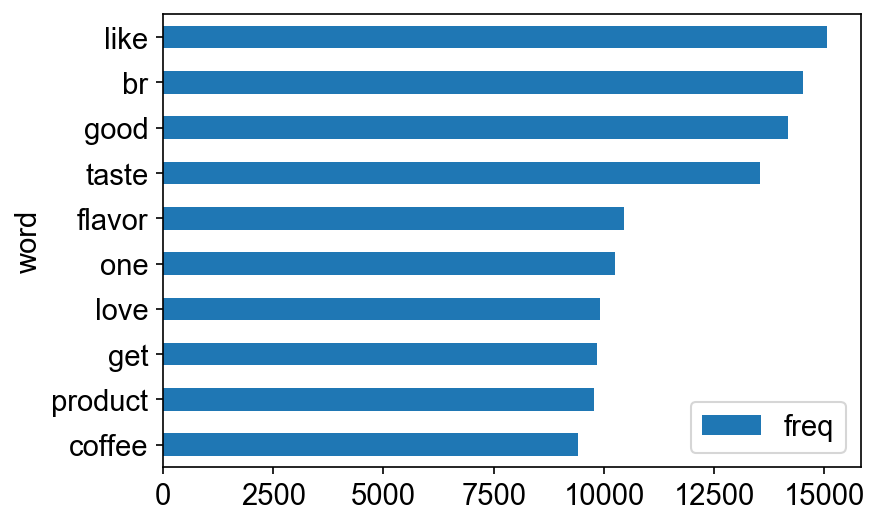

In [ ]:
#畫出詞頻圖
freq_df.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

從文字雲中可以明顯地看出一些對後續情緒分析較無影響的詞，例如:'br', 'would', 'much', 'one','use','also','could','many','amazon'



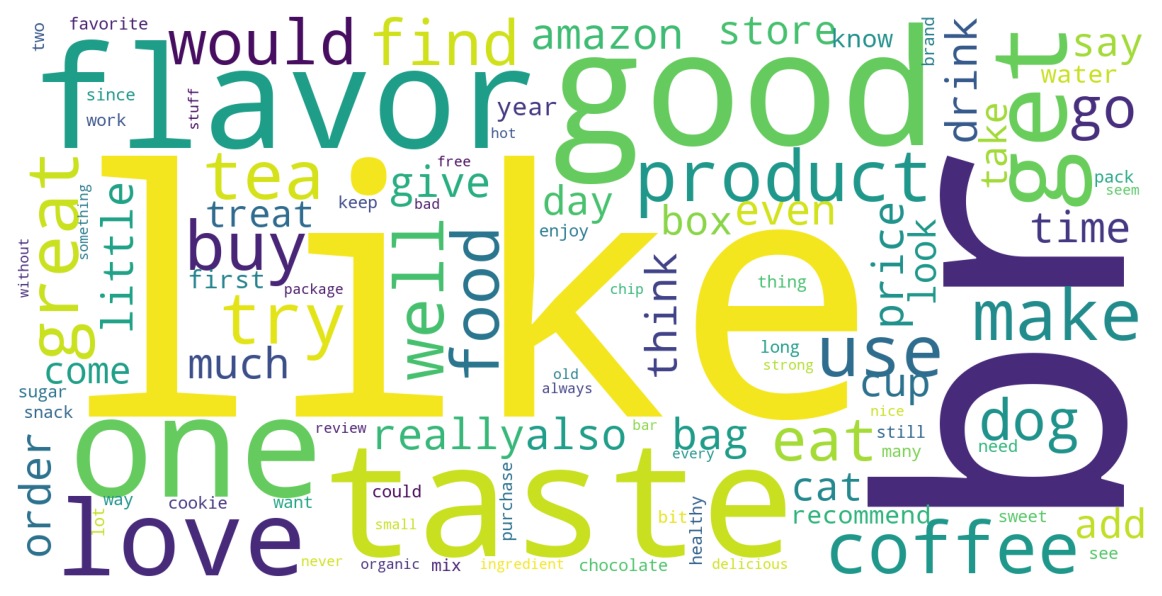

In [ ]:
text = freq_df.set_index('word').to_dict()
wordcloud = WordCloud(scale = 4, background_color = 'white', max_words=100).generate_from_frequencies(text['freq'])
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

將前述無影響的詞加入停用字字典

In [ ]:
# 手動加入停用字
newStops = ['br', 'would', 'much', 'one','use','also','could','many','amazon']
stops.extend(newStops)

做第二次刪除停用字

In [ ]:
noStop2_df = noStop_df[~noStop_df['word'].isin(stops)]
noStop2_df

,year,sentence,token,word
0,1999,For starters Im not an antiSplenda fanatic Ive...,starter,starter
0,1999,For starters Im not an antiSplenda fanatic Ive...,antiSplenda,antisplenda
0,1999,For starters Im not an antiSplenda fanatic Ive...,fanatic,fanatic
0,1999,For starters Im not an antiSplenda fanatic Ive...,user,user
0,1999,For starters Im not an antiSplenda fanatic Ive...,year,year
...,...,...,...,...
30910,2007,Im still not a food reviewer The problem is th...,make,make
30910,2007,Im still not a food reviewer The problem is th...,life,life
30910,2007,Im still not a food reviewer The problem is th...,fulfil,fulfil
30910,2007,Im still not a food reviewer The problem is th...,fairly,fairly


In [ ]:
#重新計算並列出詞頻
freq_df2 = pd.DataFrame(noStop2_df['word'].value_counts())
freq_df2 = freq_df2.reset_index()
freq_df2.columns = ['word', 'freq']
freq_df2.head(15)

,word,freq
0,like,15068
1,good,14168
2,taste,13536
3,flavor,10464
4,love,9910
5,get,9846
6,product,9776
7,coffee,9416
8,make,9391
9,try,9035


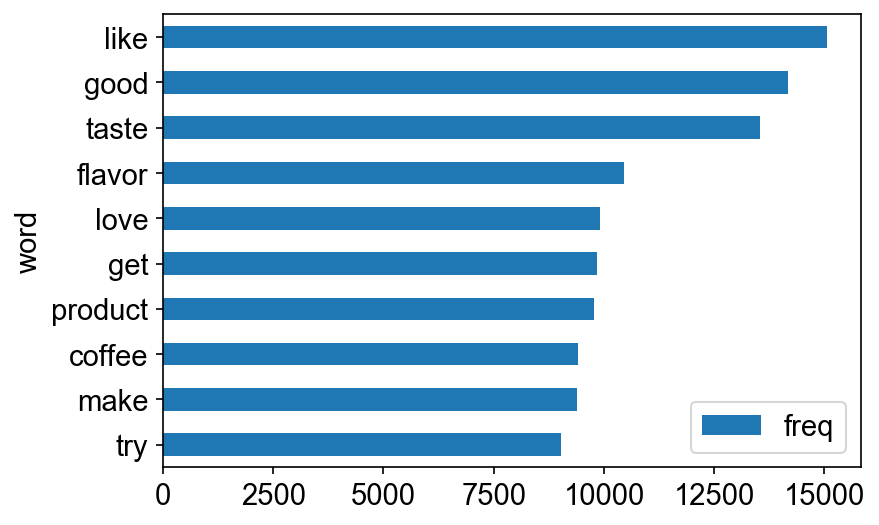

In [ ]:
freq_df2.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

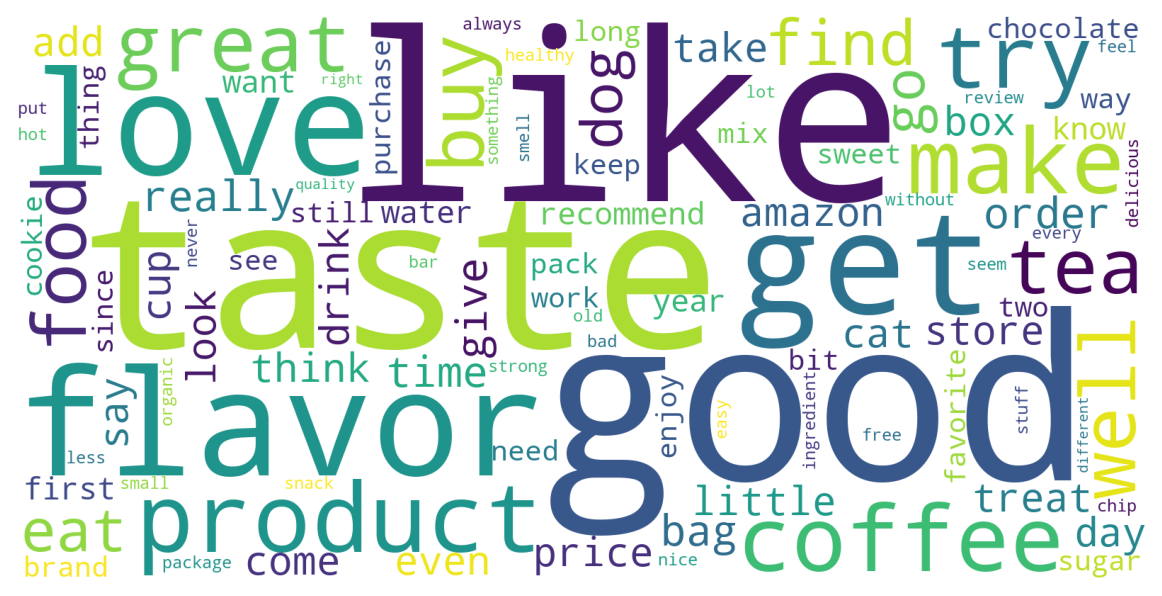

In [ ]:
#新的文字雲圖
text_2 = freq_df2.set_index('word').to_dict()
wordcloud_2 = WordCloud(scale = 4, background_color = 'white', max_words=100).generate_from_frequencies(text_2['freq'])
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_2)
plt.axis('off')
plt.show()

# 3.情緒分析

In [ ]:
# pip install transformers
# pip install torch

from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
import torch
import numpy as np

In [ ]:
#合併stem_token
aggregated_df = noStop2_df.groupby(noStop2_df.index)['word'].apply(lambda x: ' '.join(x)).reset_index(name='aggregated_words')
aggregated_df

,index,aggregated_words
0,0,starter antisplenda fanatic user year despite ...
1,1,end throw away hummus salty bitter edamame not...
2,2,sure someone give star review berry fresh tast...
3,3,like product review reader take negative feedb...
4,4,prepare red espresso rooibos tea espresso regu...
...,...,...
30906,30906,give treat little yorkie two year absolutely l...
30907,30907,disagree review love little bit crunch otherwi...
30908,30908,buy cookie easter gift two different family me...
30909,30909,everyone love pocky say lie lol pocky arrive g...


## **3.1使用NLTK_Vader**

NLTK（Natural Language Toolkit）中的VADER是用於文本情緒分析的工具，特別適用於社群媒體和網路文本。 VADER結合了一個預先定義的情緒字典和一系列基於規則的方法，能夠有效地識別和量化文本中的情感傾向。它特別擅長處理網路語言的特點，包括表情符號、俚語和網路特有的拼字方式。

VADER return like {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}，可以讓我們看出負面、中性及正面詞的比例，第四個'compound'基本上是一個指標，是所有評級的標準化值，範圍在 -1 到 1 之間。根據這些範圍，我們可以確定最終情緒是正面、負面還是中性。

**因此我們將compound小於0標記為negative，大於0為positive**。

此部分本小組用於研究評論句子的部分

In [ ]:
import requests
import pandas as pd
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#情緒分析
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Create a list to hold sentiment scores
sentiment_scores = []

# Iterate over each row in the DataFrame
for i in range(len(aggregated_df)):
    text = aggregated_df.at[i, 'aggregated_words']
    # Perform sentiment analysis
    score = sid.polarity_scores(text)
    #思考剛好＝0
    if score['compound'] >0:
      sentiment_scores.append('positive')
    else:
      sentiment_scores.append('negative')
    # Append the compound score to the list
    #sentiment_scores.append(score['compound'])

# Add the list of scores as a new column in the DataFrame
aggregated_df['sentiment_score'] = sentiment_scores

# Display the DataFrame to verify
aggregated_df2 = aggregated_df
aggregated_df2

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/billyke/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,index,aggregated_words,sentiment_score
0,0,starter antisplenda fanatic user year despite ...,positive
1,1,end throw away hummus salty bitter edamame not...,negative
2,2,sure someone give star review berry fresh tast...,positive
3,3,like product review reader take negative feedb...,negative
4,4,prepare red espresso rooibos tea espresso regu...,positive
...,...,...,...
30906,30906,give treat little yorkie two year absolutely l...,positive
30907,30907,disagree review love little bit crunch otherwi...,positive
30908,30908,buy cookie easter gift two different family me...,positive
30909,30909,everyone love pocky say lie lol pocky arrive g...,positive


In [ ]:
#生成含有年份與情緒分數的dataframe
aggregated_df_clean = {
    "index" :aggregated_df2["index"],
    "aggregated_words" :aggregated_df2["aggregated_words"],
    "year":Amazon_df_filt["Year"],
    "sentiment_score" : aggregated_df2["sentiment_score"]
}

aggregated_df_new = pd.DataFrame(aggregated_df_clean)
aggregated_df_new

,index,aggregated_words,year,sentiment_score
0,0,starter antisplenda fanatic user year despite ...,1999,positive
1,1,end throw away hummus salty bitter edamame not...,1999,negative
2,2,sure someone give star review berry fresh tast...,1999,positive
3,3,like product review reader take negative feedb...,1999,negative
4,4,prepare red espresso rooibos tea espresso regu...,1999,positive
...,...,...,...,...
30906,30906,give treat little yorkie two year absolutely l...,2007,positive
30907,30907,disagree review love little bit crunch otherwi...,2007,positive
30908,30908,buy cookie easter gift two different family me...,2007,positive
30909,30909,everyone love pocky say lie lol pocky arrive g...,2007,positive


### 依年分類正面評論及負面評論

In [ ]:
# 算出句子情緒總和(sentiment_count)

sentiment_count = pd.DataFrame(aggregated_df_new.groupby(['year', 'sentiment_score']).size()).reset_index()

mask = (sentiment_count['sentiment_score'] == "positive") | (sentiment_count['sentiment_score'] == "negative")
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: 'size'})
sentiment_count

,year,sentiment_score,size
0,1999,negative,2
1,1999,positive,4
2,2000,negative,3
3,2000,positive,29
4,2001,negative,1
5,2001,positive,12
6,2002,negative,2
7,2002,positive,71
8,2003,negative,12
9,2003,positive,120


In [ ]:
#算出不同年份的正負向情緒
pos = sentiment_count[sentiment_count['sentiment_score']=='positive']
neg = sentiment_count[sentiment_count['sentiment_score']=='negative']
pos

,year,sentiment_score,size
1,1999,positive,4
3,2000,positive,29
5,2001,positive,12
7,2002,positive,71
9,2003,positive,120
11,2004,positive,498
13,2005,positive,1193
15,2006,positive,6041
17,2007,positive,20141


In [ ]:
neg

,year,sentiment_score,size
0,1999,negative,2
2,2000,negative,3
4,2001,negative,1
6,2002,negative,2
8,2003,negative,12
10,2004,negative,60
12,2005,negative,134
14,2006,negative,576
16,2007,negative,2012


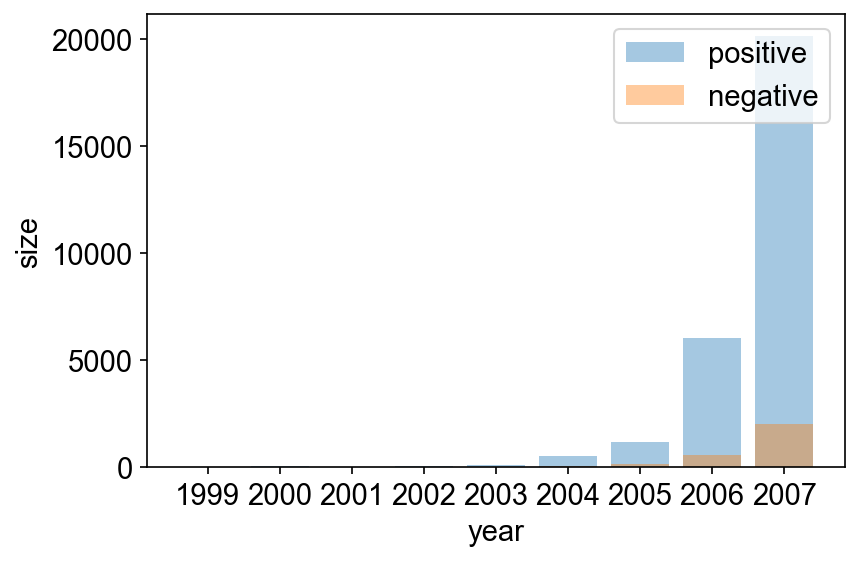

In [ ]:
# you can find other color pattern here: https://matplotlib.org/stable/gallery/color/named_colors.html
#繪出正負向數目長條\\
colors = ["tab:blue",  "tab:orange"]
fig, ax = plt.subplots()

ax.bar(pos['year'],
       pos['size'],
       color = colors[0],
       alpha = 0.4,
       align='center')
ax.bar(neg['year'],
       neg['size'],
       color = colors[1],
       alpha = 0.4,
       align='center')
plt.xlabel('year')
plt.ylabel('size')

ax.legend(['positive','negative'], loc ='upper right')
plt.show()

In [ ]:
#可查詢某一年的評論句正負向數量
sentiment_count[sentiment_count['year'] == "2000"]

,year,sentiment_score,size
2,2000,negative,3
3,2000,positive,29


In [ ]:
#計算情緒比例
sentiment_count.groupby('year')['size'].transform(lambda n : n/n.sum())

0     0.333333
1     0.666667
2     0.093750
3     0.906250
4     0.076923
5     0.923077
6     0.027397
7     0.972603
8     0.090909
9     0.909091
10    0.107527
11    0.892473
12    0.100980
13    0.899020
14    0.087049
15    0.912951
16    0.090823
17    0.909177
Name: size, dtype: float64

In [ ]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("year")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

,year,sentiment_score,size,ratio
0,1999,negative,2,0.333333
1,1999,positive,4,0.666667
2,2000,negative,3,0.093750
3,2000,positive,29,0.906250
4,2001,negative,1,0.076923
5,2001,positive,12,0.923077
6,2002,negative,2,0.027397
7,2002,positive,71,0.972603
8,2003,negative,12,0.090909
9,2003,positive,120,0.909091


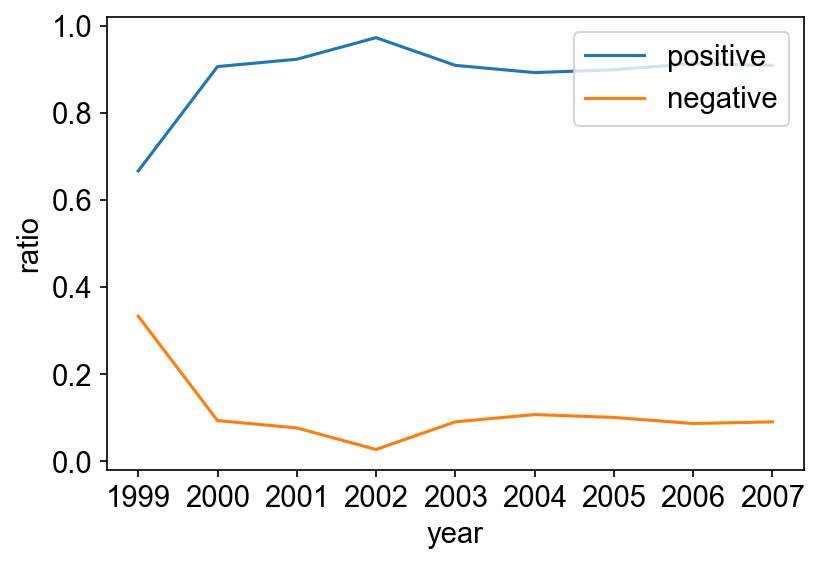

In [ ]:
#畫出不同年份正負面折線圖
pos = sentiment_count[sentiment_count['sentiment_score']=='positive']
neg = sentiment_count[sentiment_count['sentiment_score']=='negative']
fig, ax = plt.subplots()

ax.plot(pos['year'],
       pos['ratio'],
       color = colors[0])
ax.plot(neg['year'],
       neg['ratio'],
       color = colors[1])
plt.xlabel('year')
plt.ylabel('ratio')

ax.legend(['positive','negative'], loc ='upper right')

In [ ]:
#除去空值，整理出不同年份正負面評論數量
mask = ~aggregated_df_new['sentiment_score'].isna()
text_sentiment_value = sentiment_count.pivot_table(index='year', columns='sentiment_score', values='size', fill_value=0).reset_index().rename_axis(None, axis=1)
text_sentiment_value.head(10)

,year,negative,positive
0,1999,2,4
1,2000,3,29
2,2001,1,12
3,2002,2,71
4,2003,12,120
5,2004,60,498
6,2005,134,1193
7,2006,576,6041
8,2007,2012,20141


In [ ]:
# sentiment 計算方式: positive - anger - anx - negative - sad，以此計算情緒分數
text_sentiment_value["sentiment_value"] = (
    text_sentiment_value["positive"]
    - text_sentiment_value["negative"]
)
text_sentiment_value.head(10)

,year,negative,positive,sentiment_value
0,1999,2,4,2
1,2000,3,29,26
2,2001,1,12,11
3,2002,2,71,69
4,2003,12,120,108
5,2004,60,498,438
6,2005,134,1193,1059
7,2006,576,6041,5465
8,2007,2012,20141,18129


Text(0, 0.5, 'sentiment value')

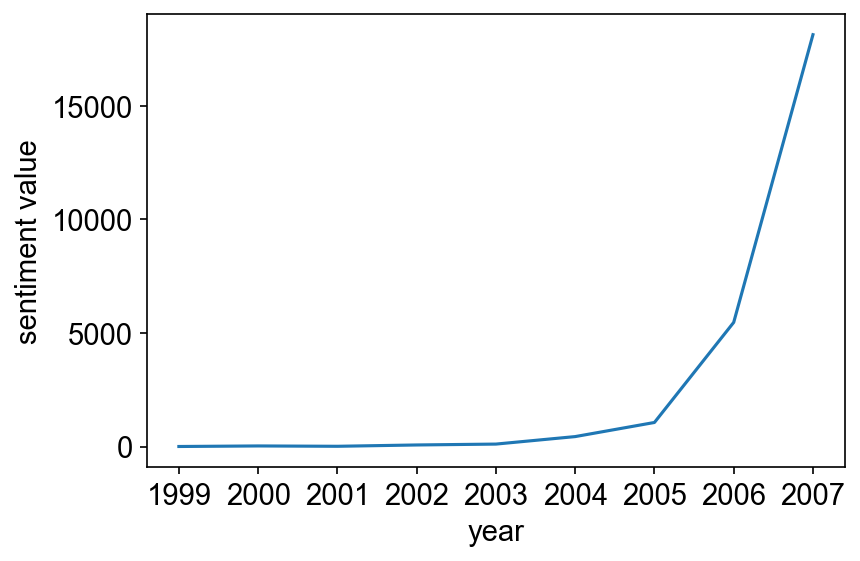

In [ ]:
#繪出折線圖
fig, ax = plt.subplots()
ax.plot(text_sentiment_value['year'], text_sentiment_value["sentiment_value"])
ax.set_xlabel('year')
ax.set_ylabel('sentiment value')

## **3.2使用LIWC_EN**
此部分本小組改成嘗試用liwc情緒字典來做情緒分析，主要著重在評論當中
"詞"的部分

In [ ]:
# 讀取情緒字典
en_dict_path = "2024_study_group7_1/dict/liwc/LIWC_EN.csv"
liwc_dict = pd.read_csv(en_dict_path)
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict

,word,sentiments
0,(:,affect
1,):,affect
2,:(,affect
3,:),affect
4,abandon,affect
...,...,...
3280,whine,sad
3281,whining,sad
3282,woe,sad
3283,worthless,sad


In [ ]:
noStop2_df

,year,sentence,token,word
0,1999,For starters Im not an antiSplenda fanatic Ive...,starter,starter
0,1999,For starters Im not an antiSplenda fanatic Ive...,antiSplenda,antisplenda
0,1999,For starters Im not an antiSplenda fanatic Ive...,fanatic,fanatic
0,1999,For starters Im not an antiSplenda fanatic Ive...,user,user
0,1999,For starters Im not an antiSplenda fanatic Ive...,year,year
...,...,...,...,...
30910,2007,Im still not a food reviewer The problem is th...,make,make
30910,2007,Im still not a food reviewer The problem is th...,life,life
30910,2007,Im still not a food reviewer The problem is th...,fulfil,fulfil
30910,2007,Im still not a food reviewer The problem is th...,fairly,fairly


In [ ]:
text_liwc_df2 = pd.merge(noStop2_df, liwc_dict, how = 'left')
text_liwc_df2

,year,sentence,token,word,sentiments
0,1999,For starters Im not an antiSplenda fanatic Ive...,starter,starter,NaN
1,1999,For starters Im not an antiSplenda fanatic Ive...,antiSplenda,antisplenda,NaN
2,1999,For starters Im not an antiSplenda fanatic Ive...,fanatic,fanatic,NaN
3,1999,For starters Im not an antiSplenda fanatic Ive...,user,user,NaN
4,1999,For starters Im not an antiSplenda fanatic Ive...,year,year,NaN
...,...,...,...,...,...
1306189,2007,Im still not a food reviewer The problem is th...,life,life,NaN
1306190,2007,Im still not a food reviewer The problem is th...,fulfil,fulfil,NaN
1306191,2007,Im still not a food reviewer The problem is th...,fairly,fairly,NaN
1306192,2007,Im still not a food reviewer The problem is th...,sure,sure,affect


### 依年分類正面評論及負面評論
以下方法同上，但主要針對詞的部分

In [ ]:
# 算出字詞情緒總和(sentiment_count)

sentiment_count2 = pd.DataFrame(text_liwc_df2.groupby(['year', 'sentiments']).size()).reset_index()

mask = (sentiment_count2['sentiments'] == "positive") | (sentiment_count2['sentiments'] == "negative")
sentiment_count2 = sentiment_count2.loc[mask]

sentiment_count2 = sentiment_count2.rename(columns={0: 'size'})
sentiment_count2

,year,sentiments,size
3,1999,negative,9
4,1999,positive,22
8,2000,negative,15
9,2000,positive,104
14,2001,negative,14
15,2001,positive,46
20,2002,negative,57
21,2002,positive,359
26,2003,negative,100
27,2003,positive,523


In [ ]:
#列出正負面詞彙數量
pos2 = sentiment_count2[sentiment_count2['sentiments']=='positive']
neg2 = sentiment_count2[sentiment_count2['sentiments']=='negative']
pos2

,year,sentiments,size
4,1999,positive,22
9,2000,positive,104
15,2001,positive,46
21,2002,positive,359
27,2003,positive,523
33,2004,positive,2012
39,2005,positive,4756
45,2006,positive,23298
51,2007,positive,76998


In [ ]:
neg2

,year,sentiments,size
3,1999,negative,9
8,2000,negative,15
14,2001,negative,14
20,2002,negative,57
26,2003,negative,100
32,2004,negative,432
38,2005,negative,1049
44,2006,negative,4626
50,2007,negative,15966


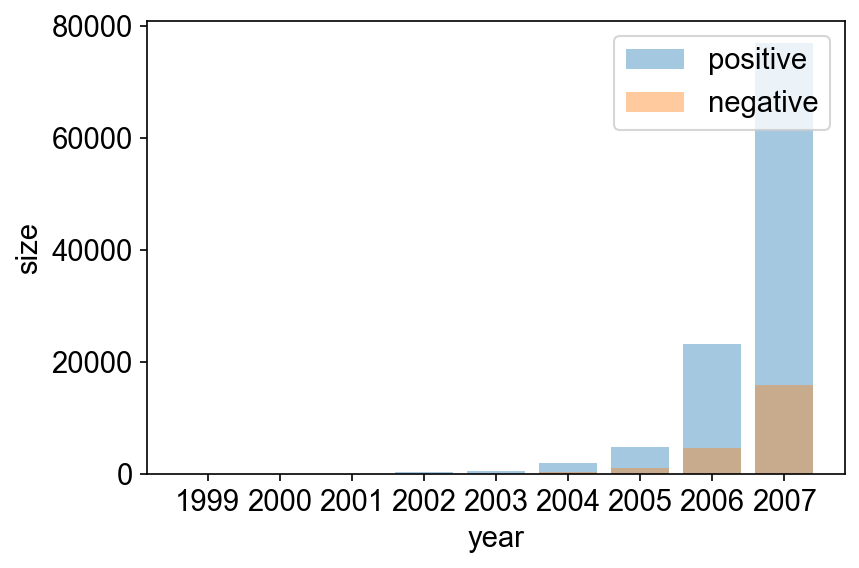

In [ ]:
# you can find other color pattern here: https://matplotlib.org/stable/gallery/color/named_colors.html
#正負面折線圖
colors = ["tab:blue",  "tab:orange"]
fig, ax = plt.subplots()

ax.bar(pos2['year'],
       pos2['size'],
       color = colors[0],
       alpha = 0.4,
       align='center')
ax.bar(neg2['year'],
       neg2['size'],
       color = colors[1],
       alpha = 0.4,
       align='center')
plt.xlabel('year')
plt.ylabel('size')

ax.legend(['positive','negative'], loc ='upper right')
plt.show()


In [ ]:
sentiment_count2.groupby('year')['size'].transform(lambda n : n/n.sum())

3     0.290323
4     0.709677
8     0.126050
9     0.873950
14    0.233333
15    0.766667
20    0.137019
21    0.862981
26    0.160514
27    0.839486
32    0.176759
33    0.823241
38    0.180706
39    0.819294
44    0.165664
45    0.834336
50    0.171744
51    0.828256
Name: size, dtype: float64

In [ ]:
#計算字詞情緒比例
sentiment_count2 = sentiment_count2.assign(
    ratio=sentiment_count2.groupby("year")["size"].transform(lambda n: n / n.sum())
)
sentiment_count2

,year,sentiments,size,ratio
3,1999,negative,9,0.290323
4,1999,positive,22,0.709677
8,2000,negative,15,0.126050
9,2000,positive,104,0.873950
14,2001,negative,14,0.233333
15,2001,positive,46,0.766667
20,2002,negative,57,0.137019
21,2002,positive,359,0.862981
26,2003,negative,100,0.160514
27,2003,positive,523,0.839486


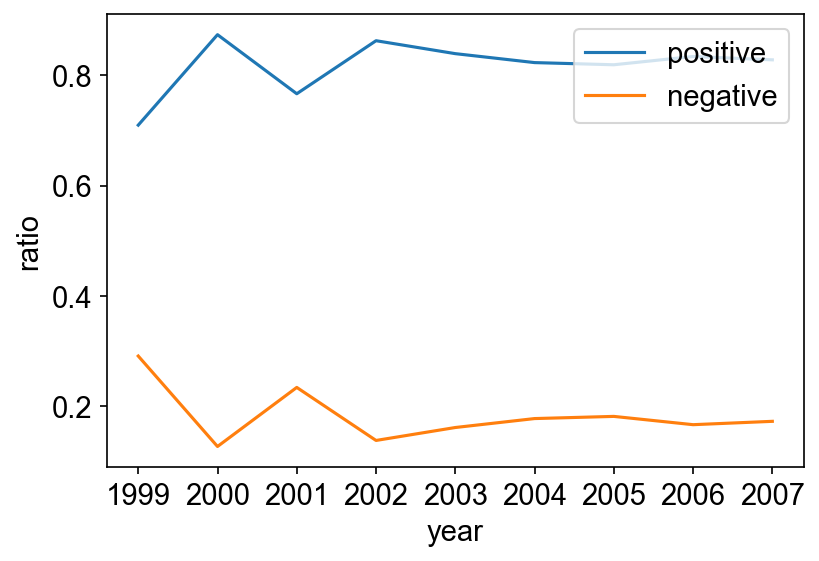

In [ ]:
#字詞情緒折線圖
pos2 = sentiment_count2[sentiment_count2['sentiments']=='positive']
neg2 = sentiment_count2[sentiment_count2['sentiments']=='negative']
fig, ax = plt.subplots()

ax.plot(pos2['year'],
       pos2['ratio'],
       color = colors[0])
ax.plot(neg2['year'],
       neg2['ratio'],
       color = colors[1])
plt.xlabel('year')
plt.ylabel('ratio')

ax.legend(['positive','negative'], loc ='upper right')

In [ ]:
#不同年份字詞的正負向數量
mask = ~text_liwc_df2['sentiments'].isna()
text_sentiment_value2 = sentiment_count2.pivot_table(index='year', columns='sentiments', values='size', fill_value=0).reset_index().rename_axis(None, axis=1)
text_sentiment_value2.head(10)

,year,negative,positive
0,1999,9,22
1,2000,15,104
2,2001,14,46
3,2002,57,359
4,2003,100,523
5,2004,432,2012
6,2005,1049,4756
7,2006,4626,23298
8,2007,15966,76998


In [ ]:
# 字詞sentiment 計算方式: positive - anger - anx - negative - sad
text_sentiment_value2["sentiment_value2"] = (
    text_sentiment_value2["positive"]
    - text_sentiment_value2["negative"]
)
text_sentiment_value2.head(10)

,year,negative,positive,sentiment_value2
0,1999,9,22,13
1,2000,15,104,89
2,2001,14,46,32
3,2002,57,359,302
4,2003,100,523,423
5,2004,432,2012,1580
6,2005,1049,4756,3707
7,2006,4626,23298,18672
8,2007,15966,76998,61032


Text(0, 0.5, 'sentiment value')

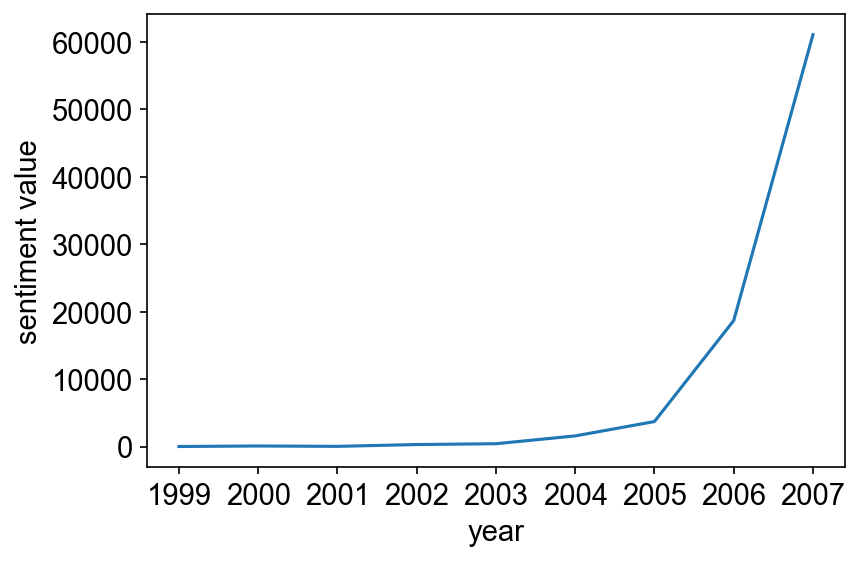

In [ ]:
#不同年份sentiment value折線圖
fig, ax = plt.subplots()
ax.plot(text_sentiment_value2['year'], text_sentiment_value2["sentiment_value2"])
ax.set_xlabel('year')
ax.set_ylabel('sentiment value')

In [ ]:
#以2006年為例，查詢2006年且為負面詞彙前5個
mask = (text_liwc_df2['year']=="2006") & (text_liwc_df2['sentiments']=='negative')
text_tf_by_ch_df2 = text_liwc_df2.loc[mask]
text_tf_by_ch_df2.head()

,year,sentence,token,word,sentiments
96101,2006,Although it seems like it might cost a little ...,stale,stale,negative
96134,2006,The coffee is just OK Its very mild almost bor...,weak,weak,negative
96303,2006,I love this avocado oil rich easy to pour grea...,low,low,negative
96376,2006,Did the groundhog leave my motherinlaws garden...,alone,alone,negative
96386,2006,Did the groundhog leave my motherinlaws garden...,ignore,ignore,negative


In [ ]:
#計算出2006negative
word_count_count = pd.DataFrame(text_tf_by_ch_df2.groupby(['word']).size()).reset_index().rename(columns={0: "size"})
word_count_count = word_count_count.sort_values(by='size', ascending=False)
word_count_count

,word,size
20,bad,462
154,problem,329
123,low,280
22,bitter,187
44,cut,120
...,...,...
88,forbid,1
191,sicken,1
92,greed,1
187,shit,1


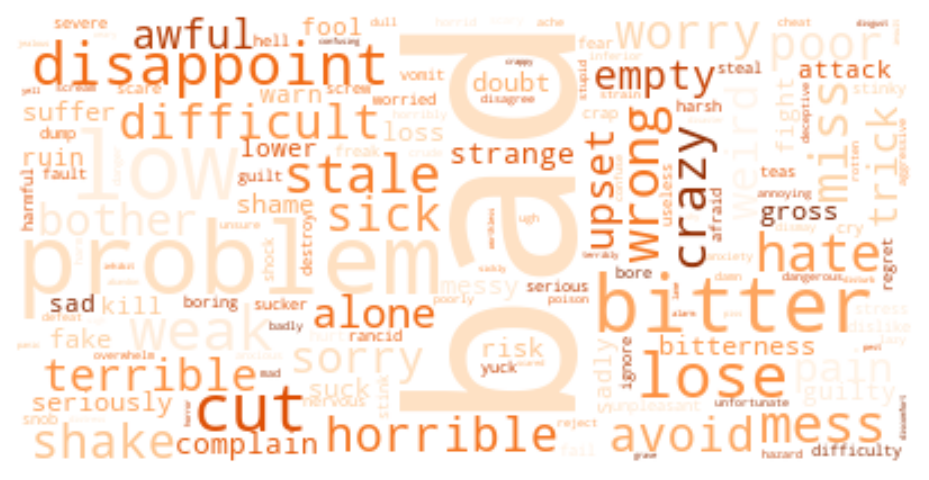

In [ ]:
## wordcloud 的 input 是一個 dict, key是 word, value 是次數
cloud = WordCloud(max_words=200, background_color="white", colormap="Oranges")
wc_45 = dict(zip(word_count_count['word'], word_count_count['size']))
cloud.generate_from_frequencies(wc_45)
# 繪圖
# plt.figure(figsize=(10,5), dpi=300)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#從整個資料集集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字
word_count = text_liwc_df2.groupby(['word', 'sentiments']).size().reset_index()
word_count.columns = ['word', 'sentiments','size']
word_count.sort_values("size", ascending=False)

,word,sentiments,size
604,good,affect,14168
605,good,positive,14168
886,love,positive,9910
885,love,affect,9910
623,great,affect,8951
...,...,...,...
1519,tragically,affect,1
1518,tragic,sad,1
1517,tragic,negative,1
1516,tragic,affect,1


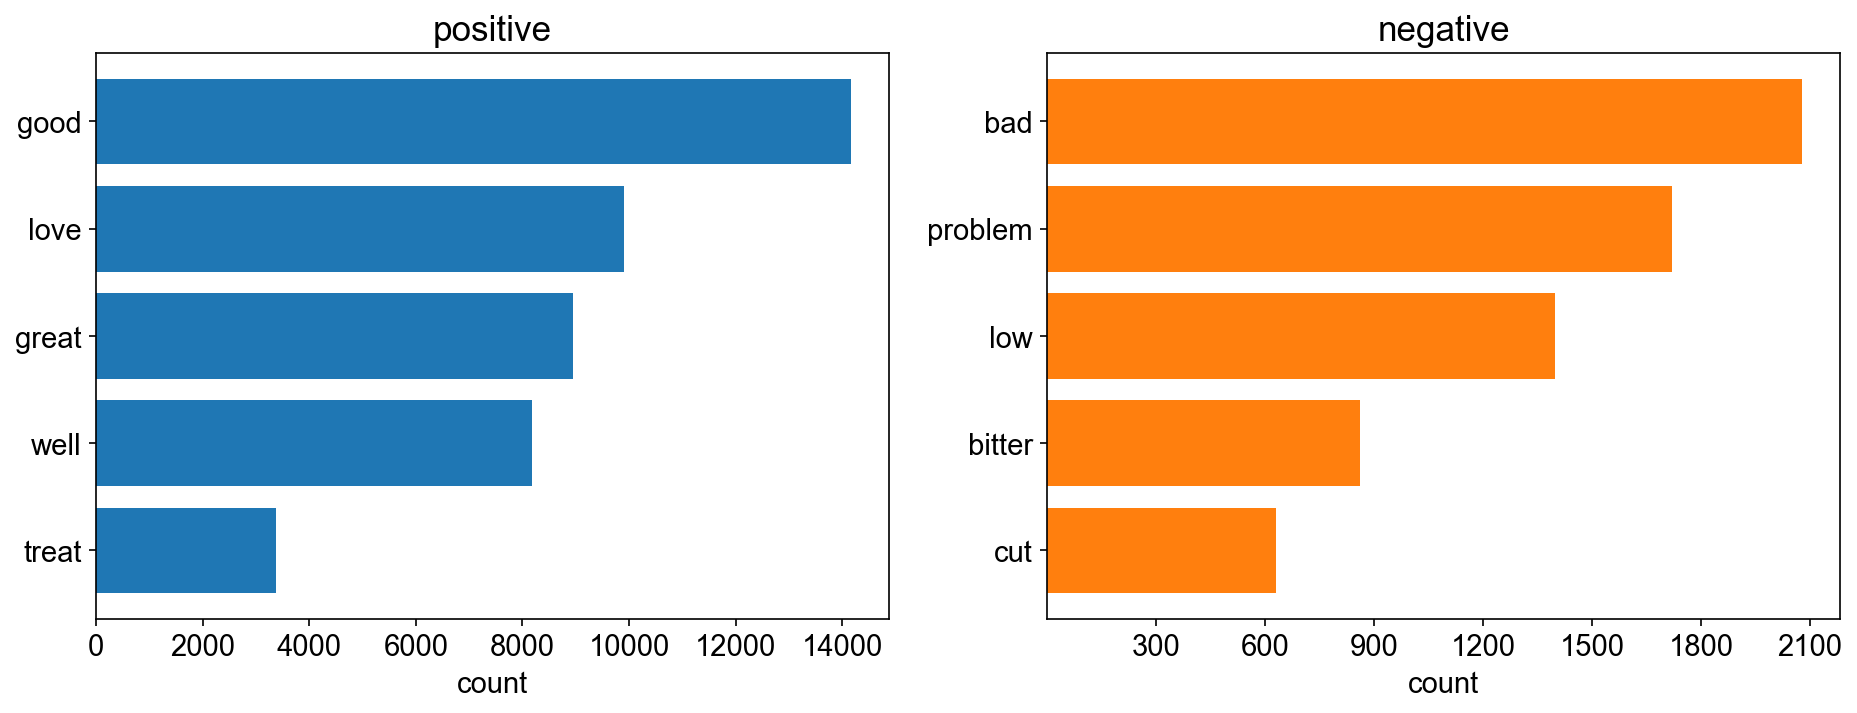

In [ ]:
#繪出正負面前五多的詞彙
pos = word_count[word_count['sentiments']=='positive'].sort_values(['size'],ascending=True)
pos = pos[-5:]
neg = word_count[word_count['sentiments']=='negative'].sort_values(['size'],ascending=True)
neg = neg[-5:]
fig, ax = plt.subplots(1,2, figsize = (15, 5))

ax[0].barh(pos['word'],
           pos['size'],
           color = colors[0])
ax[0].set_xlabel('count')
ax[0].set_title("positive")

ax[1].xaxis.set_ticks([25,50,75,100,125,150,175])
ax[1].barh(neg['word'],
           neg['size'],
           color = colors[1])
ax[1].set_xlabel('count')
ax[1].set_title("negative")
ax[1].xaxis.set_ticks([300,600,900,1200,1500,1800,2100])

In [ ]:
#此以評論數最多的2007年為例，列出sentiments與size
mask = (text_liwc_df2['year']=="2007") & (~text_liwc_df2['sentiments'].isna())
word_count_2007 = text_liwc_df2.loc[mask, ['word','sentiments']]
word_count_2007 = word_count_2007.groupby(['word', 'sentiments']).size().reset_index(name='size')
word_count_2007.sort_values('size',ascending=False)

,word,sentiments,size
585,good,affect,9991
586,good,positive,9991
859,love,positive,7108
858,love,affect,7108
601,great,affect,6384
...,...,...,...
1033,pitiable,sad,1
837,lone,sad,1
72,anxiousness,affect,1
920,mooch,negative,1


Text(0.5, 0, 'count')

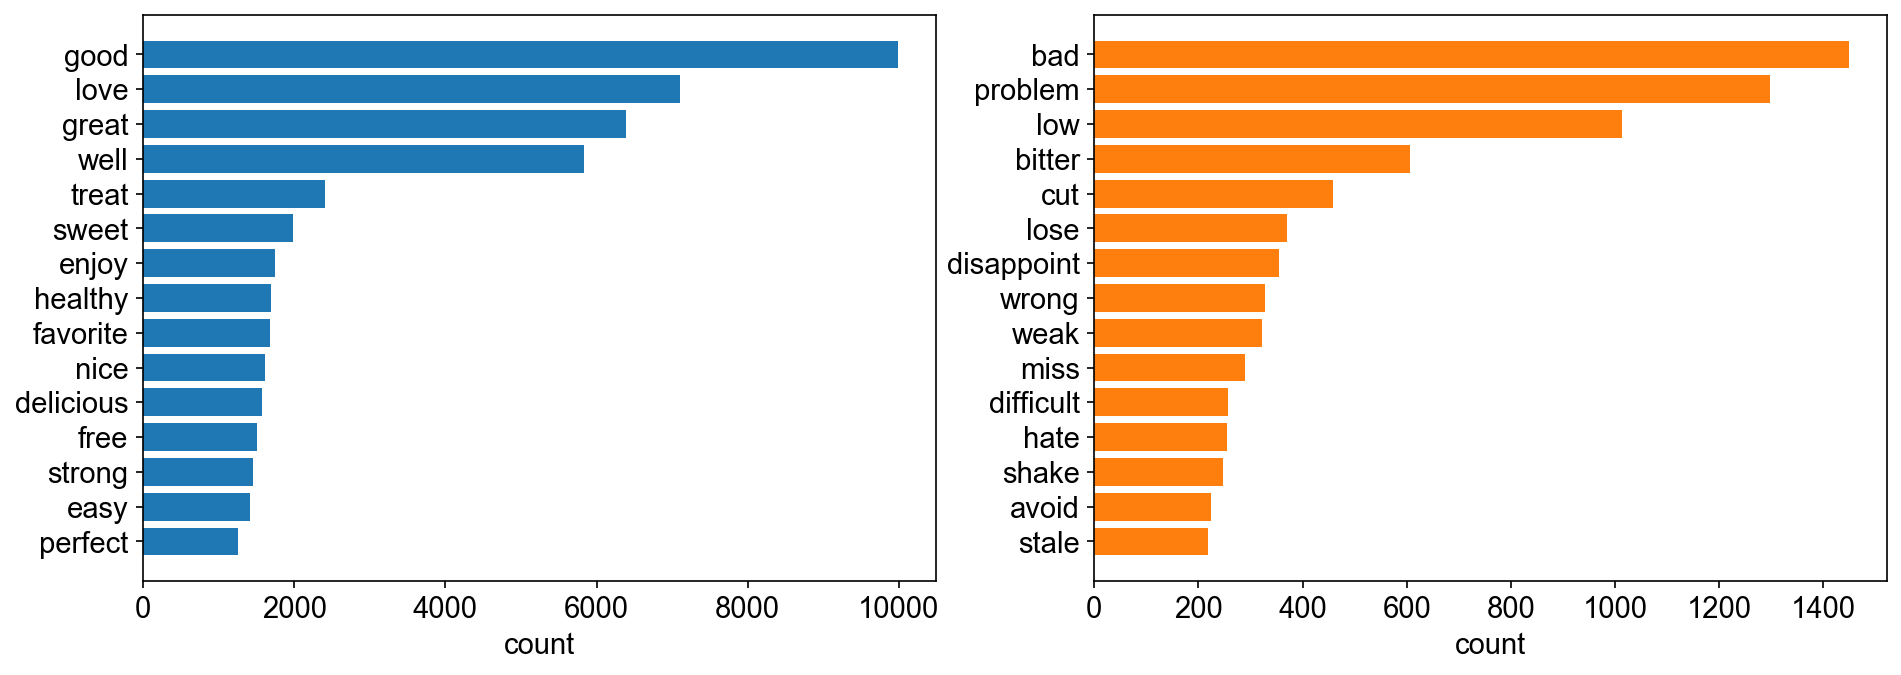

In [ ]:
#列出2007年前15多的正負面詞彙，並以圖呈現
pos = word_count_2007[word_count_2007['sentiments']=='positive'].sort_values(['size'],ascending=True)
pos = pos[-15:]
neg = word_count_2007[word_count_2007['sentiments']=='negative'].sort_values(['size'],ascending=True)
neg = neg[-15:]
fig, ax = plt.subplots(1,2, figsize = (15, 5))

ax[0].barh(pos['word'],
           pos['size'],
           color = colors[0])
ax[0].set_xlabel('count')
ax[1].barh(neg['word'],
           neg['size'],
           color = colors[1])
ax[1].set_xlabel('count')

##### 透過此研究，可以發現可能因為科技進步、行動裝置普及、社群媒體擴大，使得評論數隨著年份迅速增加
##### 從中也能發現關於Amazon food的正向評價也越來越高，表示從社群媒體中得到的建議，有助於Amazon服務的改善。
##### 另外像文字雲中的產品如coffee，明顯看出其較為顯著，是否能從顯著出現的產品中去進行改善，提升服務、產品品質
##### ，也是文字探勘研究帶來的一大助益。 